# Using midiutil to make music from an IR spectrum

In [41]:
#import all python modules needed

from midiutil import MIDIFile
%pylab inline   # this imports numpy, matplotlib

Populating the interactive namespace from numpy and matplotlib


/home/chobday/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['degrees', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [42]:
## Import the data
#### Here its a CSV format IR spectrum of C60+

[0.97885 1.01612 0.97103 ... 0.99287 0.99609 0.98927]


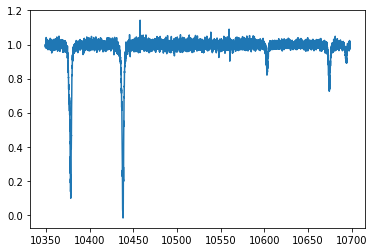

In [7]:
data = np.loadtxt('C60plus.csv',skiprows=1, delimiter=',')
plt.plot(data[:,0],data[:,1])
ab = data[:,1]
print(ab)

In [5]:
#### Fit the spectrum to a scale by defining a midi scale (C scale). 
#### Take the minimum and maximum values of intensity of our spectrum, then create bins which correspond to how many notes we have in our scale. In this case its 15 notes, so we have 15 bins to put our absorption data in.
#### Then fill these bins with each data point of our IR absorption
#### Then convert the absorption to the note from the scale.

In [40]:
scale= [36,38,40,43,45,48,50,52,55,57,60,62,64,67,69,72,74,76,79,81]
print(len(scale))
print(min(ab)) #minimum absorption
print(max(ab))#maximum absorption

bins = np.linspace(min(ab),max(ab),len(scale)) #our original data split into 15 bins, corresponding to our 15 notes
abs_binned = np.digitize(ab,bins) #our data put into these 15 bins
unique_bins = np.unique(abs_binned) # array of our unique bins 

revalue = dict(zip(unique_bins, scale)) # dictionary to map our scale to the binned values of our IR absorption
notes = [revalue.get(n, n) for n in abs_binned] #put the absorptions onto the scale

#print(notes)

20
-0.01695
1.14248


#### Assign lengths to the notes of each absorption "note"

In [29]:
duration = []
durations_choice = np.array([0.25,0.5,0.75])
for i in range(len(notes)):
    duration.append(random.choice(durations_choice))

#### Add the notes into a midi file with help of midi util.

#### Here is where you can go crazy and edit a lot parameters contained within a midi file 
#### for more information have a look at the MIDIUtil Docs https://readthedocs.org/projects/midiutil/downloads/pdf/latest/
#### If you just want it into midi format to play around with in your own midi compatible software just keep the variables as their defaults.

In [39]:
# Set up some variables for the MIDIUtil program to work
track    = 0
channel  = 0
time     = 0            # In beats
tempo    = 120          # In BPM
volume   = 100          # 0-127, as per the MIDI standard
clocks_per_tick = 24    # The clocks_per_tick argument specifies the number of clock ticks per metronome click. 
                        #By definition there are 24 ticks in a quarter note, so a metronome click per quarter note would be 24
notes_per_quarter = 8   # It specifies the number of 32nd notes in a MIDI quarter note. 
                        #Usually there are 8 32nd notes in a quarter note (8/32 = 1/4), so the default value is
8.

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
MyMIDI.addTempo(track, time, tempo)
MyMIDI.addTimeSignature(track, time, 4, 4, clocks_per_tick, notes_per_quarter )   #add a time signature, here just 4/4

#loop over each time step 
i=0
for n in notes:  #loop over each note
    MyMIDI.addNote(track, channel, pitch[i], time+i, duration[i], volume)
    i=i+1

#save the resulting midi file.    
with open("MyMidiFile.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)